# mecab의 설치

1. mecab-ko 설치

cd /tmp

sudo wget https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz

sudo tar xvf mecab-0.996-ko-0.9.2.tar.gz

cd /tmp/mecab-0.996-ko-0.9.2

sudo ./configure

sudo make check

sudo make install

 

 

2. mecab-dic 설치

cd /tmp

wget https://bitbucket.org/eunjeon/mecab-ko-dic/downloads/mecab-ko-dic-2.1.1-20180720.tar.gz

tar zxvf mecab-ko-dic-2.1.1-20180720.tar.gz

cd /tmp/mecab-ko-dic-2.1.1-20180720

sudo ./configure

sudo make

sudo apt-get install libmecab2 mecab mecab-ipadic mecab-ipadic-utf8

sudo make install
 
참고 : https://sosomemo.tistory.com/30

In [9]:
from konlpy.tag import Mecab
mecab = Mecab()

print(mecab.pos('대한민국 만세 만셈 으어 나는 나넌 너의 친구야.'))

[('대한민국', 'NNP'), ('만세', 'NNG'), ('만', 'JX'), ('셈', 'NNG'), ('으어', 'IC'), ('나', 'NP'), ('는', 'JX'), ('나', 'NP'), ('넌', 'NP+JX'), ('너', 'NP'), ('의', 'JKG'), ('친구', 'NNG'), ('야', 'VCP+EF'), ('.', 'SF')]


In [10]:
print(f"pos 품사 추출 : {mecab.pos('중간고사 점수 내가 반에서 제일 잘 받음')}")
print(f"morphs 형태소 추출 : {mecab.morphs('중간고사 점수 내가 반에서 제일 잘 받음')}")
print(f"nouns 명사 추출 : {mecab.nouns('중간고사 점수 내가 반에서 제일 잘 받음')}")

pos 품사 추출 : [('중간고사', 'NNG'), ('점수', 'NNG'), ('내', 'NP'), ('가', 'JKS'), ('반', 'NNG'), ('에서', 'JKB'), ('제일', 'MAG'), ('잘', 'MAG'), ('받', 'VV'), ('음', 'ETN')]
morphs 형태소 추출 : ['중간고사', '점수', '내', '가', '반', '에서', '제일', '잘', '받', '음']
nouns 명사 추출 : ['중간고사', '점수', '내', '반']


In [12]:
import pandas as pd

In [16]:

df = pd.read_csv('/data/ephemeral/hsk/level1-semantictextsimilarity-nlp-01/data/train.csv')

In [17]:
def morphs_to_sentence(sentence):
    morphs = mecab.morphs(sentence)
    return ' '.join(morphs)

In [18]:
df['sentence_1'][0]

'스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~'

In [19]:
morphs_to_sentence(df['sentence_1'][0])

'스릴 도 있 고 반전 도 있 고 여느 한국 영화 쓰레기 들 하고 는 차원 이 다르 네요 ~'

### 데이터 형태소 단위로 쪼개기

In [20]:
# sentence_1과 sentence_2 칼럼에 대해 형태소 추출 및 변환
df['sentence_1'] = df['sentence_1'].apply(morphs_to_sentence)
df['sentence_2'] = df['sentence_2'].apply(morphs_to_sentence)



# 변환된 데이터를 새로운 CSV 파일로 저장
df.to_csv('train_morphs.csv', index=False)

# 결과 확인
df.head()

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴 도 있 고 반전 도 있 고 여느 한국 영화 쓰레기 들 하고 는 차원 이 다르 ...,"반전 도 있 고 , 사랑 도 있 고 재미 도 있 네요 .",2.2,0.0
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제 가 접근 권한 이 없 다고 뜹니다 ;;,"오 , 액세스 권한 이 없 다고 합니다 .",4.2,1.0
2,boostcamp-sts-v1-train-002,petition-sampled,주택 청약 조건 변경 해 주 세요 .,주택 청약 무주택 기준 변경 해 주 세요 .,2.4,0.0
3,boostcamp-sts-v1-train-003,slack-sampled,입사 후 처음 대면 으로 만나 반가웠 습니다 .,화상 으로 만 보 다가 리얼 로 만나 니 정말 반가웠 습니다 .,3.0,1.0
4,boostcamp-sts-v1-train-004,slack-sampled,뿌듯 뿌듯 하 네요 ! !,꼬옥 실제로 한 번 뵈 어요 뿌 뿌 뿌 ~!~!,0.0,0.0


# 데이터를 형태소 단위로 쪼개고, label 0 데이터를 5로 일정부분 옮겨서 증강하기


In [ ]:
import pandas as pd
from konlpy.tag import Mecab
from transformers import pipeline

# 데이터 로드
data = pd.read_csv('/data/ephemeral/hsk/level1-semantictextsimilarity-nlp-01/data/train.csv')


# 형태소 분석기 초기화
mecab = Mecab()

In [ ]:
def morphs_to_sentence(sentence):
    morphs = mecab.morphs(sentence)
    return ' '.join(morphs)

In [ ]:
# sentence_1과 sentence_2 칼럼에 대해 형태소 추출 및 변환
data['sentence_1'] = data['sentence_1'].apply(morphs_to_sentence)
data['sentence_2'] = data['sentence_2'].apply(morphs_to_sentence)

In [ ]:
# Label 값이 0.0인 데이터 필터링
data_0 = data[data['label'] == 0.0]
data_0

### label이 0인 데이터 중에서 문장구조가 비교적 좋은 문장 필터링

In [ ]:
from konlpy.tag import Mecab

# 형태소 분석기 초기화
mecab = Mecab()

# 문장 구조가 완벽한지 확인하는 함수
def is_complete_sentence(sentence):
    pos_tags = mecab.pos(sentence)
    has_subject = False
    has_predicate = False
    has_object = False
    has_adverb = False
    has_particle = False
    
    for word, tag in pos_tags:
        if tag in ['NNG', 'NNP', 'NP']:  # 주어
            has_subject = True
        elif tag in ['VV', 'VA', 'VX', 'VCP', 'VCN']:  # 서술어
            has_predicate = True
        elif tag == 'MAG':  # 부사
            has_adverb = True
        elif tag in ['JKS', 'JKC', 'JKG', 'JKO', 'JKB', 'JKV', 'JKQ', 'JX']:  # 조사
            has_particle = True
        elif tag == 'NNG':  # 목적어
            has_object = True
    
    return has_subject and has_predicate and has_adverb and has_particle

# 문장 구조가 완벽한 문장만 추출
data_0_complete_sentence_1 = data_0[data_0['sentence_1'].apply(is_complete_sentence)]
data_0_complete_sentence_2 = data_0[data_0['sentence_2'].apply(is_complete_sentence)]


### fill-mask 파이프라인 만들기

In [ ]:
import pandas as pd
from konlpy.tag import Mecab
from transformers import pipeline

# fill-mask 파이프라인 설정
fill_mask = pipeline(
    "fill-mask",
    model="monologg/koelectra-base-v3-generator",
    tokenizer="monologg/koelectra-base-v3-generator"
)

def mask_and_fill(sentence):
    pos_tags = mecab.pos(sentence)
    for word, tag in pos_tags:
        if tag == 'MAG':  # 부사 태그
            masked_sentence = sentence.replace(word, '{}', 1)
            fill_mask_result = fill_mask(masked_sentence.format(fill_mask.tokenizer.mask_token))
            new_sentence = fill_mask_result[0]['sequence']
            if new_sentence != sentence and abs(len(new_sentence) - len(sentence)) >= 3:
                return new_sentence
    return None



### 필터링된 문장에서 fill-mask 파이프라인 거침

In [ ]:
augmented_data = []
for index, row in data_0_complete_sentence_1.iterrows():
    new_sentence = mask_and_fill(row['sentence_1'])
    if new_sentence:
        augmented_row = row.copy()
        augmented_row['sentence_2'] = new_sentence
        augmented_row['label'] = 4.8
        augmented_data.append(augmented_row)

augmented_1_df = pd.DataFrame(augmented_data)

augmented_data = []
for index, row in data_0_complete_sentence_2.iterrows():
    new_sentence = mask_and_fill(row['sentence_2'])
    if new_sentence:
        augmented_row = row.copy()
        augmented_row['sentence_1'] = new_sentence
        augmented_row['label'] = 4.8
        augmented_data.append(augmented_row)

augmented_2_df = pd.DataFrame(augmented_data)


### 중복 행 제거

In [ ]:
# 중복된 행 제거
def remove_duplicates(data, augmented_1_df, augmented_2_df):
    combined_sentences = set(augmented_1_df['sentence_1']).union(set(augmented_1_df['sentence_2']))
    combined_sentences = combined_sentences.union(set(augmented_2_df['sentence_1'])).union(set(augmented_2_df['sentence_2']))
    
    data = data[~data['sentence_1'].isin(combined_sentences)]
    data = data[~data['sentence_2'].isin(combined_sentences)]
    
    return data

# 함수 호출
cleaned_data = remove_duplicates(data, augmented_1_df, augmented_2_df)


### 데이터 프레임 합치기

In [ ]:
# 데이터프레임 합치기
combined_df = pd.concat([cleaned_data, augmented_1_df, augmented_2_df], ignore_index=True)

### label 0인 데이터 중에서 형태소 태깅이 0이 넘는 sentence_1과 sentence_2는 각각을 copy하여 라벨 5짜리로 옮겨줄것

In [ ]:
# Mecab 형태소 분석기 초기화
mecab = Mecab()

# 형태소 분석 및 태깅 종류 개수 계산 함수
def count_pos_tags(sentence):
    pos_tags = mecab.pos(sentence)
    unique_tags = set(tag for _, tag in pos_tags)
    return len(unique_tags)

# 조건에 맞는 행 처리
new_rows = []
for index, row in combined_df.iterrows():
    if row['label'] == 0.0:
        sentence_1_tags = count_pos_tags(row['sentence_1'])
        sentence_2_tags = count_pos_tags(row['sentence_2'])
        
        if sentence_1_tags > 10 or sentence_2_tags > 10:
            row['label'] = 5.0
            row['sentence_2'] = row['sentence_1']
            
            if sentence_2_tags > 10:
                new_row = row.copy()
                new_row['sentence_2'] = row['sentence_1']
                new_rows.append(new_row)

# 새로운 행 추가
combined_df = pd.concat([combined_df, pd.DataFrame(new_rows)], ignore_index=True)


In [ ]:
# 중복된 id를 찾기
duplicate_ids = combined_df[combined_df.duplicated('id', keep=False)]['id'].unique()

# label이 0.0인 중복된 id 행 제거
cleaned_df = combined_df[~((combined_df['id'].isin(duplicate_ids)) & (combined_df['label'] == 0.0))]

# 중복된 id 중 label이 0.0이 아닌 행은 유지
cleaned_df = pd.concat([cleaned_df, combined_df[(combined_df['id'].isin(duplicate_ids)) & (combined_df['label'] != 0.0)]], ignore_index=True).drop_duplicates()

In [ ]:
shuffled_data = cleaned_df.sample(frac=1).reset_index(drop=True)

In [ ]:
# 변환된 데이터를 새로운 CSV 파일로 저장
shuffled_data.to_csv('train.csv', index=False)

In [ ]:
import matplotlib.pyplot as plt

# 히스토그램 그리기
plt.figure(figsize=(10, 6))
plt.hist(shuffled_data['label'], bins=51, edgecolor='black')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Histogram of Label Values')
plt.xticks([0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.grid(True)
plt.show()

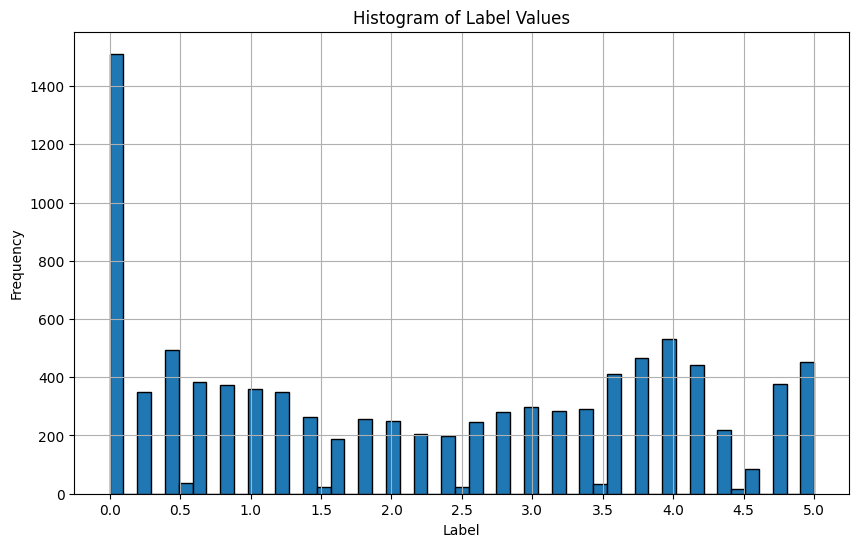